In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [11]:
df1 = pd.read_csv(r'student-mat.csv', delimiter=';')

In [13]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [37]:
df1['pass'] = df1['G3'].apply(lambda x:1 if x>10 else 0)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,0


In [39]:
df1.drop('G3',axis=1,inplace=True)

In [47]:
categorical_cols = df1.select_dtypes(include='object').columns

In [51]:
le = LabelEncoder()
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])

df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,pass
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,0
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,0


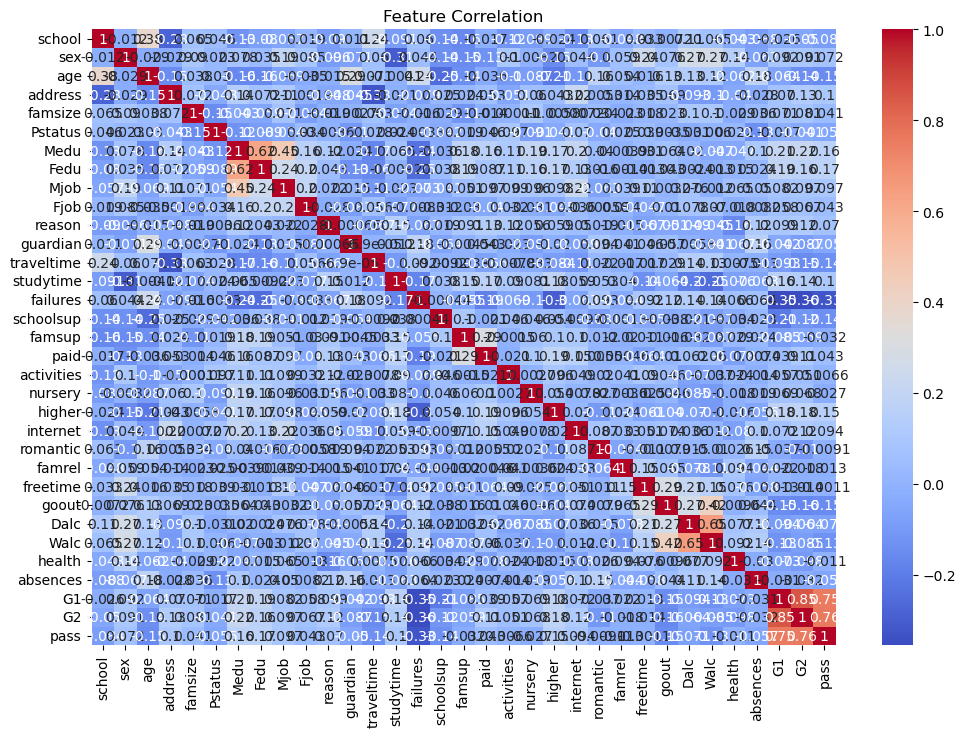

In [55]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

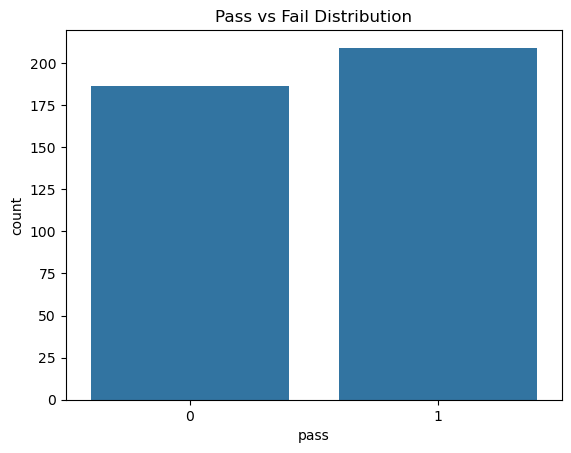

In [57]:
# Countplot of target
sns.countplot(x='pass', data=df1)
plt.title("Pass vs Fail Distribution")
plt.show()

In [59]:
X = df1.drop(columns=['pass'])
y = df1['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9493670886075949

Confusion Matrix:
 [[35  3]
 [ 1 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.93      0.98      0.95        41

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



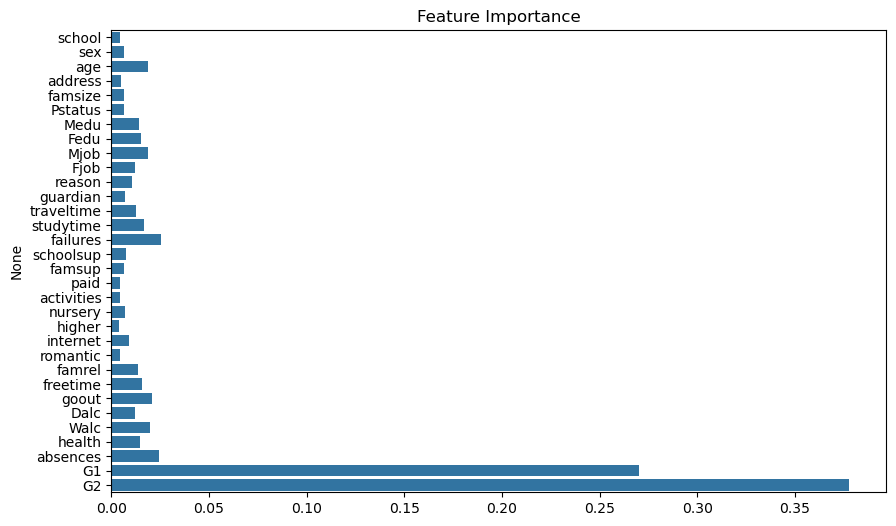

In [65]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()